In [3]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


import rdflib as rdf
import pytesseract
import os
from pathlib import Path

In [57]:
index = 0
low_blue_arr = [86, 144, 43]
high_blue_arr = [135, 255, 255]
im_path = r'../samples/images/Tied a dicsőség.JPG'

In [58]:
stream = open(im_path, "rb")
bytes = bytearray(stream.read())
numpyarray = np.asarray(bytes, dtype=np.uint8)
this_img = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)

In [107]:
def read_file(pic, name, contours):
    i = 0
    j = 0
    file = open("recognized_" + name + ".txt", "w+") 
    file.write("") 
    file.close() 
    pytesseract.pytesseract.tesseract_cmd = r'../../szakdoga/Tesseract-OCR/tesseract.exe'
    x0, y0, w0, h0 = cv2.boundingRect(contours[0])
    
#         alter = pytesseract.image_to_string(pic, lang='hun', config='--psm 6')
#         hImg, wImg, _ = pic.shape
#         boxes = pytesseract.image_to_boxes(pic)
#         concatable = ""
#         for b in boxes.splitlines():
#             b = b.split(' ')
#             concatable += "".join(b[0])
#             x,y,w,h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
#             cv2.rectangle(pic, (x, hImg-y), (w, hImg-h), (0, 0, 255), 3)
#             cv2.putText(pic, b[0], (x, hImg-y+25), cv2.FONT_HERSHEY_COMPLEX, 1, (50, 50 ,255), 2)
        
#         print(concatable)

#         plt.imshow(pic)
#         plt.show()
    counterpls = 2
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(pic, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Cropping the text block for giving input to OCR 
        cropped = pic[y:y + h, x:x + w]

        file = open("recognized_" + name + ".txt", "a")

        # Apply OCR on the cropped image 
        text = pytesseract.image_to_string(cropped, config='--psm 6')

        #plt.rcParams['figure.figsize'] = [16,14]
        plt.imshow(cropped)
        #plt.savefig(rf'../samples/recognized_texts/images/{name}_{counterpls}.png')
        counterpls += 1

        #plt.show()
        # print(text)

        while text.isspace():
            print("ok")
            drag_low_sat.value -= i
            change_arrays()
            show_img(pic, name) 
            text = pytesseract.image_to_string(pic[y:y + h + i, x:x + w + j], config='--psm 6')
            if not text.isspace() and y+h+i > y+h+(i-1):
                i+=1
            if not text.isspace() and x+w+j > x+w+(j-1):
                j+=1
        file.write(text) 
        if h0 < h:
            file.write("\n") 

        # Close the file 
        file.close 

In [110]:
def show_img(pic = this_img):
    lower_blue = np.array(low_blue_arr)
    upper_blue = np.array(high_blue_arr)

    # Convert the image to gray scale 
    hsv = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)

    # plt.rcParams['figure.figsize'] = [16,14]
    # plt.show(hsv)
    # plt.savefig(rf'../samples/recognized_texts/images/hsv_image.png')

    mask = cv2.inRange(hsv, lower_blue, upper_blue)

        # Performing OTSU threshold 
    mask_inv = cv2.bitwise_not(mask)
    ret, thresh1 = cv2.threshold(mask, 0, 255, cv2.THRESH_OTSU |cv2.THRESH_OTSU)
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (28, 28)) 

    # Appplying dilation on the threshold image 
    dilation = cv2.dilate(mask, rect_kernel, iterations = 1) 

    # Finding contours 
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    plt.imshow(dilation)
    # plt.imsave(arr=hsv, fname=rf'../samples/recognized_texts/images/hsv_image.png')

    # read_file(thresh1, im_path[18:].replace('.JPG', ''), contours)

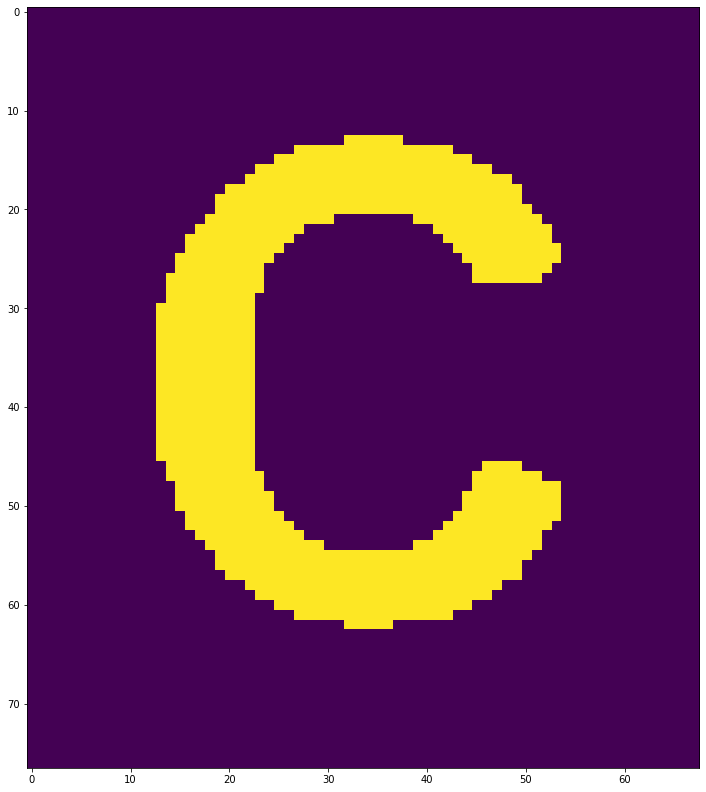

In [109]:
show_img(this_img)